In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

## Relation

In [9]:
corr = data.corr()

<Axes: >

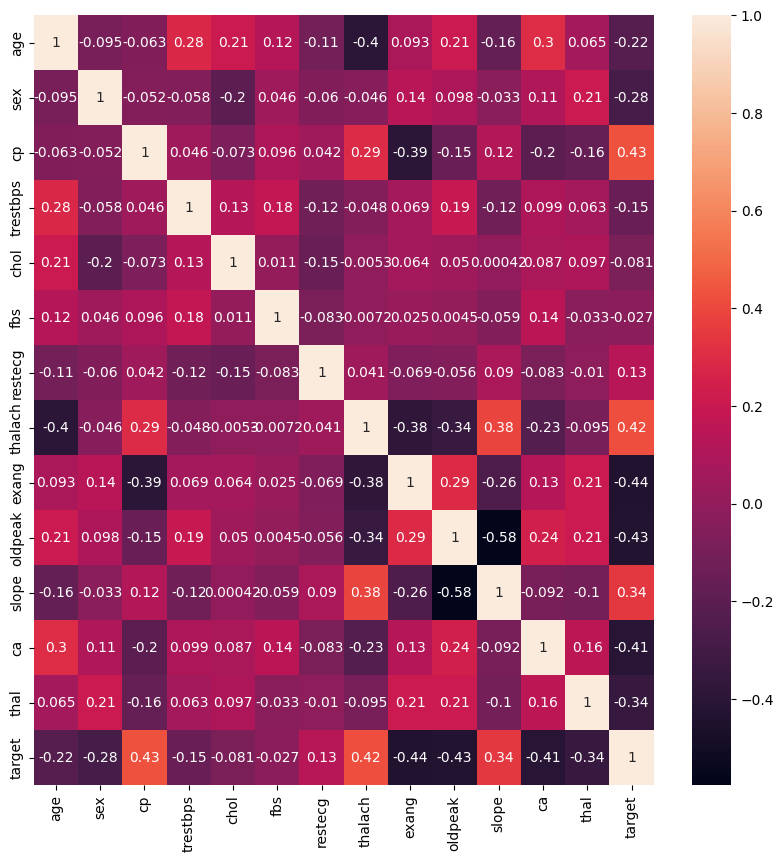

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [11]:
# # Least corr
# data['trestbps']
# data['chol']
# data['fbs']
# data['restecg']

In [12]:
corr['target'].sort_values()

exang      -0.435601
oldpeak    -0.429146
ca         -0.408992
thal       -0.343101
sex        -0.283609
age        -0.221476
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
slope       0.343940
thalach     0.419955
cp          0.432080
target      1.000000
Name: target, dtype: float64

In [13]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

## Split , Train, Test

In [14]:
X =  data.drop(['target'], axis= 1)
y = data['target']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
pred_df = X_test.copy()
pred_df["preds"] = dtree.predict(X_test)
pred_df["act"] = data['target']

In [18]:
pred_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,preds,act
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0,0
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,0,1
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,1,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0,0
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1,1
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0,0


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(pred_df['act'], pred_df['preds']))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78        35
           1       0.85      0.71      0.77        41

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.79      0.78      0.78        76



(Text(0.5, 23.52222222222222, 'Pred'), Text(50.722222222222214, 0.5, 'act'))

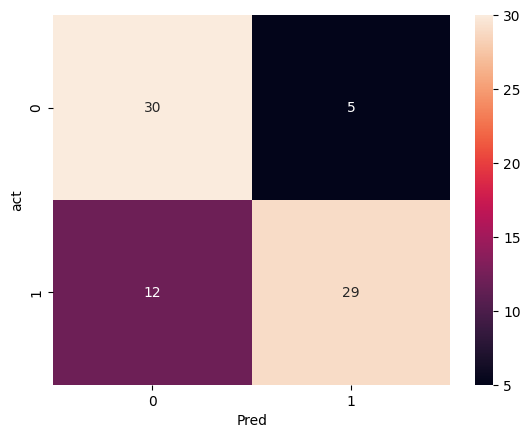

In [26]:
cm = confusion_matrix(pred_df['act'], pred_df['preds'])
sns.heatmap(cm, annot=True)
plt.xlabel('Pred'), plt.ylabel('act')

In [36]:
## correct
tn = cm[0][0]
tp = cm[1][1]
print(f'Correct=> tp:{tp}, tn:{tn}')
## Incorrect
fn = cm[1][0]
fp = cm[0][1]
print(f'Correct=> fp:{fp}, tp:{fn}')


Correct=> tp:29, tn:30
Correct=> fp:5, tp:12


In [41]:
precision = tp /( tp + fp)  ## Ratio of (correctly predicted positives ) // (total predicted positives )
precision

0.8529411764705882

In [42]:
recall = tp / (tp + fn) ## Ratio of (correctly predicted positives ) // (actual positives)
recall

0.7073170731707317

In [46]:
accuracy = (tp + tn) / (tp + fp + tn + fn) * 100  ##  ( correct prediction  ) // ( total prediction )
accuracy

77.63157894736842

In [47]:
f1_score = 2 * (recall * precision) / (recall + precision)
f1_score

0.7733333333333334

In [58]:
support_1 = y_test[y_test==0].count() ## Count of actual classes
support_0 = y_test[y_test==1].count() ## Count of actual classes
support_0, support_1

(41, 35)